<a href="https://colab.research.google.com/github/Premalatha44/Machine-Learning-Projects/blob/main/Time_series_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv("https://raw.githubusercontent.com/Sagu12/FBPROPHET-TIME-SERIES-FORECASTING/main/milk.csv")

In [19]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [20]:
df.dtypes

Month                                                       object
Monthly milk production: pounds per cow. Jan 62 ? Dec 75     int64
dtype: object

In [21]:
df.columns=['ds','y']
df.head()

,ds,y
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


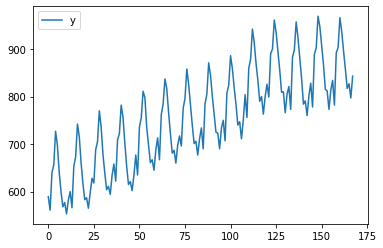

In [22]:
df.plot()

In [23]:
df['ds']=pd.to_datetime(df.ds)

In [24]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [27]:
from fbprophet import Prophet

In [28]:
model=Prophet()

In [29]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future=model.make_future_dataframe(periods=365)

In [31]:
df.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


In [32]:
future.tail()

,ds
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29
532,1976-11-30


In [46]:
pred=model.predict(future)

In [35]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.941323,576.784402,596.973059,606.941323,606.941323,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,0.0,0.0,0.0,586.789525
1,1962-02-01,608.656256,536.982612,555.554290,608.656256,608.656256,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,0.0,0.0,0.0,546.067637
2,1962-03-01,610.205228,631.586722,651.268856,610.205228,610.205228,31.365739,31.365739,31.365739,31.365739,31.365739,31.365739,0.0,0.0,0.0,641.570967
3,1962-04-01,611.920161,648.549473,668.337949,611.920161,611.920161,46.703773,46.703773,46.703773,46.703773,46.703773,46.703773,0.0,0.0,0.0,658.623935
4,1962-05-01,613.579774,711.889770,732.113750,613.579774,613.579774,108.040207,108.040207,108.040207,108.040207,108.040207,108.040207,0.0,0.0,0.0,721.619981


In [47]:
pred[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.789525,576.631641,596.360864
1,1962-02-01,546.067637,536.115794,556.071204
2,1962-03-01,641.570967,631.925859,651.453273
3,1962-04-01,658.623935,648.190085,668.962486
4,1962-05-01,721.619981,712.171691,731.195675
...,...,...,...,...
528,1976-11-26,815.347638,803.893054,826.113716
529,1976-11-27,818.479106,808.375748,829.406307
530,1976-11-28,821.790064,811.356492,833.542049
531,1976-11-29,825.219679,814.477556,835.841729


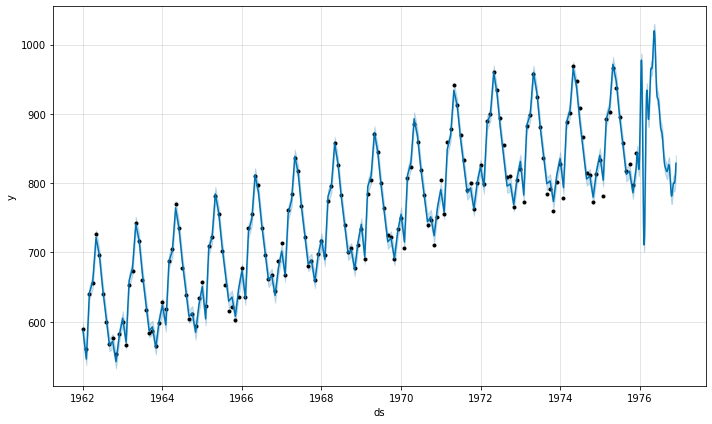

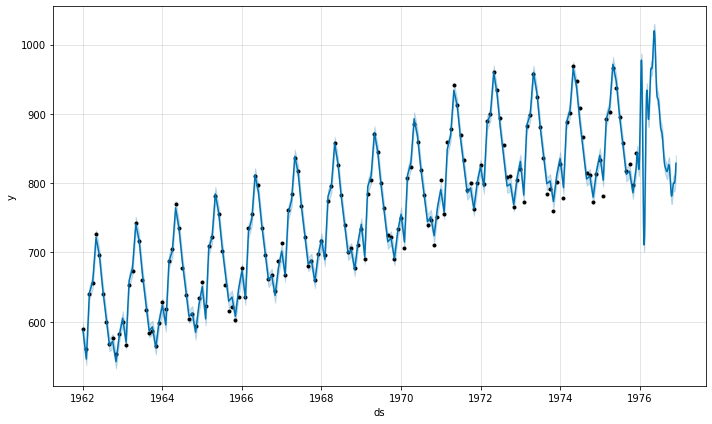

In [44]:
model.plot(pred)

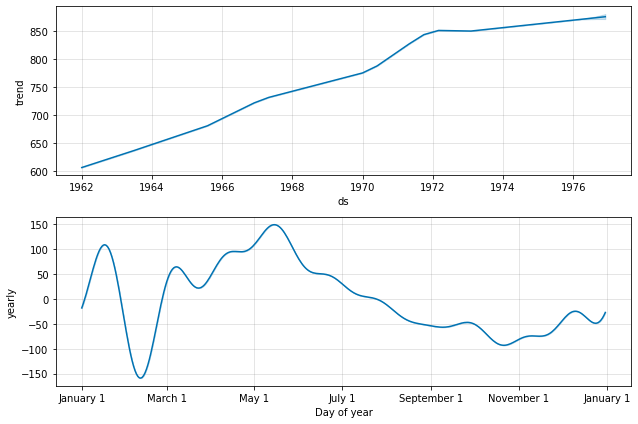

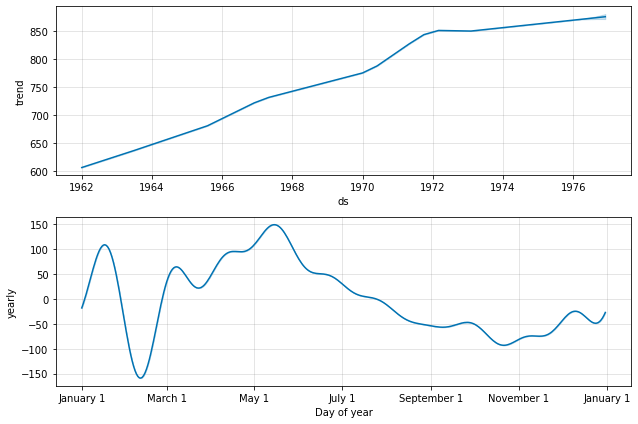

In [48]:
model.plot_components(pred)